In [30]:
import tensorflow as tf

In [31]:
imdb = tf.keras.datasets.imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)
print('Length of train data {}, length of test data {}.'.format(len(train_data), len(test_data)))
print(train_data[0])

Length of train data 25000, length of test data 25000.
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [32]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()

# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [33]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [34]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [35]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [36]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [37]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [38]:
vocab_size = 10000

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_label[:10000]
partial_y_train = train_label[10000:]

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 61ms/step - loss: 0.6919 - accuracy: 0.5409 - val_loss: 0.6900 - val_accuracy: 0.6496
Epoch 2/40
30/30 [==============================] - 2s 60ms/step - loss: 0.6864 - accuracy: 0.7199 - val_loss: 0.6826 - val_accuracy: 0.7098
Epoch 3/40
30/30 [==============================] - 2s 56ms/step - loss: 0.6748 - accuracy: 0.7461 - val_loss: 0.6679 - val_accuracy: 0.7482
Epoch 4/40
30/30 [==============================] - 2s 55ms/step - loss: 0.6536 - accuracy: 0.7706 - val_loss: 0.6430 - val_accuracy: 0.7543
Epoch 5/40
30/30 [==============================] - 2s 55ms/step - loss: 0.6211 - accuracy: 0.7856 - val_loss: 0.6084 - val_accuracy: 0.7776
Epoch 6/40
30/30 [==============================] - 2s 61ms/step - loss: 0.5791 - accuracy: 0.8067 - val_loss: 0.5674 - val_accuracy: 0.7979
Epoch 7/40
30/30 [==============================] - 2s 63ms/step - loss: 0.5321 - accuracy: 0.8239 - val_loss: 0.5241 - val_accuracy: 0.8100
Epoch 8/40
30

In [42]:
model.evaluate(test_data, test_label, verbose=2)

782/782 - 1s - loss: 0.3318 - accuracy: 0.8730


[0.33182644844055176, 0.8730000257492065]

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

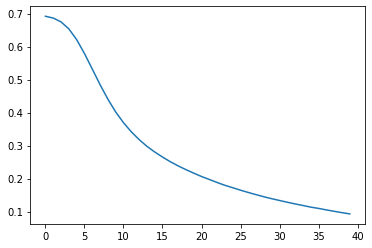

In [62]:
plt.plot(history.epoch, history.history['loss'])
plt.show()

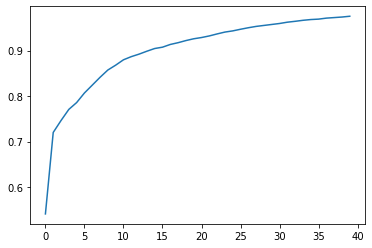

In [64]:
plt.plot(history.epoch, history.history['accuracy'])
plt.show()

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])